In [368]:
# %load LOOCV.py
from matplotlib import pyplot as plt
import lasio
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from model import one_cnn_model, three_cnn_model, bp_model, LinearRegression_model
import openpyxl
from sklearn.svm import SVR
from DataSet import dataset_lab
from Normalization import Normalization, Anti_Normalization, Normalization_lab, Anti_Normalization_lab
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree
from sklearn import model_selection

In [369]:
# 读取初始化相关数据
fileName_23 = './井/WY23.las'
fileName_35 = "./井/WY35.las"
las_23 = lasio.read(fileName_23)
b = 6

In [370]:
Para_VVR, df_Para, Aim, de_Aim, data, train_data_length = dataset_lab(b)
print("train_data_length: ", train_data_length)

train_data_length:  154


In [371]:
NL_input_data, NL_output_data = Normalization_lab(data, train_data_length)
print(NL_input_data.shape)

(47, 1, 3)


cnn

In [376]:
loo = LeaveOneOut()
loo.get_n_splits(NL_input_data)
cnn =[]
NL_input_data = NL_input_data.reshape(-1, 1, 3)
NL_output_data = NL_output_data.reshape(-1, 1, 1)
for train_index, test_index in loo.split(NL_input_data):
    NL_train_X_data, NL_test_X_data = NL_input_data[train_index], NL_input_data[test_index]
    NL_train_Y_data, NL_test_Y_data = NL_output_data[train_index], NL_output_data[test_index]
    
    yhat, model, history = three_cnn_model(NL_train_X_data, NL_train_Y_data, NL_test_X_data, 50)
    
    yhat = Anti_Normalization_lab(data, NL_test_X_data, yhat)
    cnn.append(yhat)
#     print("yhat:", yhat)
#     print("yhat_array[test_index][0]:", yhat_array[test_index][0])
cnn = np.array(cnn)

KeyboardInterrupt: 

lr

In [373]:
loo = LeaveOneOut()
loo.get_n_splits(NL_input_data)
lr =[]

for train_index, test_index in loo.split(NL_input_data):
    NL_train_X_data, NL_test_X_data = NL_input_data[train_index], NL_input_data[test_index]
    NL_train_Y_data, NL_test_Y_data = NL_output_data[train_index], NL_output_data[test_index]
    NL_train_X_data, NL_train_Y_data, NL_test_X_data = NL_train_X_data.reshape(-1, data.shape[1] - 1), NL_train_Y_data.reshape(-1,1), NL_test_X_data.reshape(-1, data.shape[1] - 1)

    yhat, model, score, ev = LinearRegression_model(NL_train_X_data, NL_train_Y_data, NL_test_X_data, NL_test_Y_data)
    
    yhat = Anti_Normalization_lab(data, NL_test_X_data, yhat)
    lr.append(yhat)
#     print("yhat:", yhat)
#     print("yhat_array[test_index][0]:", yhat_array[test_index][0])
lr = np.array(lr)

yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)
yhat.shape: (1, 1)


dt

In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(NL_input_data)
dt =[]

for train_index, test_index in loo.split(NL_input_data):
    NL_train_X_data, NL_test_X_data = NL_input_data[train_index], NL_input_data[test_index]
    NL_train_Y_data, NL_test_Y_data = NL_output_data[train_index], NL_output_data[test_index]

    NL_train_X_data, NL_train_Y_data, NL_test_X_data = NL_train_X_data.reshape(-1, data.shape[1] - 1), NL_train_Y_data.reshape(-1,1), NL_test_X_data.reshape(-1, data.shape[1] - 1)

    dtr = tree.DecisionTreeRegressor(random_state=32)
    yhat = dtr.fit(NL_train_X_data, NL_train_Y_data).predict(NL_test_X_data).reshape(-1, 1)
    
    yhat = Anti_Normalization_lab(data, NL_test_X_data, yhat)
    dt.append(yhat)
#     print("yhat:", yhat)
#     print("yhat_array[test_index][0]:", yhat_array[test_index][0])
dt= np.array(dt)

rf

In [374]:
loo = LeaveOneOut()
loo.get_n_splits(NL_input_data)
rf =[]
for train_index, test_index in loo.split(NL_input_data):
    NL_train_X_data, NL_test_X_data = NL_input_data[train_index], NL_input_data[test_index]
    NL_train_Y_data, NL_test_Y_data = NL_output_data[train_index], NL_output_data[test_index]

    NL_train_X_data, NL_train_Y_data, NL_test_X_data = NL_train_X_data.reshape(-1, data.shape[1] - 1), NL_train_Y_data.reshape(-1,1), NL_test_X_data.reshape(-1, data.shape[1] - 1)
    rfr = RandomForestRegressor(random_state=70)
    yhat = rfr.fit(NL_train_X_data,NL_train_Y_data).predict(NL_test_X_data).reshape(-1, 1)

    yhat = Anti_Normalization_lab(data, NL_test_X_data, yhat)
    rf.append(yhat)
#     print("yhat:", yhat)
#     print("yhat_array[test_index][0]:", yhat_array[test_index][0])
rf= np.array(rf)

svr

In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(NL_input_data)
svr =[]
for train_index, test_index in loo.split(NL_input_data):
    NL_train_X_data, NL_test_X_data = NL_input_data[train_index], NL_input_data[test_index]
    NL_train_Y_data, NL_test_Y_data = NL_output_data[train_index], NL_output_data[test_index]

    NL_train_X_data, NL_train_Y_data, NL_test_X_data = NL_train_X_data.reshape(-1, data.shape[1] - 1), NL_train_Y_data.reshape(-1,1), NL_test_X_data.reshape(-1, data.shape[1] - 1)
    svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.01)
    yhat = svr_rbf.fit(NL_train_X_data, NL_train_Y_data).predict(NL_test_X_data).reshape(-1, 1)

    yhat = Anti_Normalization_lab(data, NL_test_X_data, yhat)
    svr.append(yhat)
#     print("yhat:", yhat)
#     print("yhat_array[test_index][0]:", yhat_array[test_index][0])
svr= np.array(svr)

a_Aim: [[0.53532008 0.34      ]
 [0.39944243 0.31      ]
 [0.56502543 0.38      ]
 [0.42460325 0.27      ]
 [0.57754243 0.66      ]
 [0.68100898 0.94      ]
 [0.89196821 0.78      ]
 [1.9335985  1.76      ]
 [1.66161583 1.8466545 ]
 [1.86374987 1.66068162]
 [2.08395609 1.81981593]
 [2.09138485 1.94671182]
 [2.23883984 1.73520329]
 [1.97990407 2.28356167]
 [1.99722638 1.89253988]
 [1.96763405 2.34064806]
 [2.73071408 2.47647158]
 [2.47409852 2.45862375]
 [2.14829998 3.27705053]
 [2.73871747 2.44126372]
 [2.20439473 2.30508386]
 [3.07079628 2.85687003]
 [2.94213363 2.6269005 ]
 [3.04229962 3.23689673]
 [3.55826794 3.88517228]
 [3.75347499 3.82588478]
 [4.13750498 4.43293719]
 [3.50575338 4.32633246]
 [3.4518171  4.21771238]
 [3.94461935 4.30568365]
 [4.17180074 2.41404531]
 [2.67026337 2.71993469]
 [2.62238474 2.15543291]
 [3.55816024 2.22342526]
 [2.85232718 2.10596929]
 [2.8331088  2.24002492]
 [2.79030278 2.69853242]
 [4.32329053 2.58978105]
 [4.37660029 5.31958444]
 [3.66203187 4.970

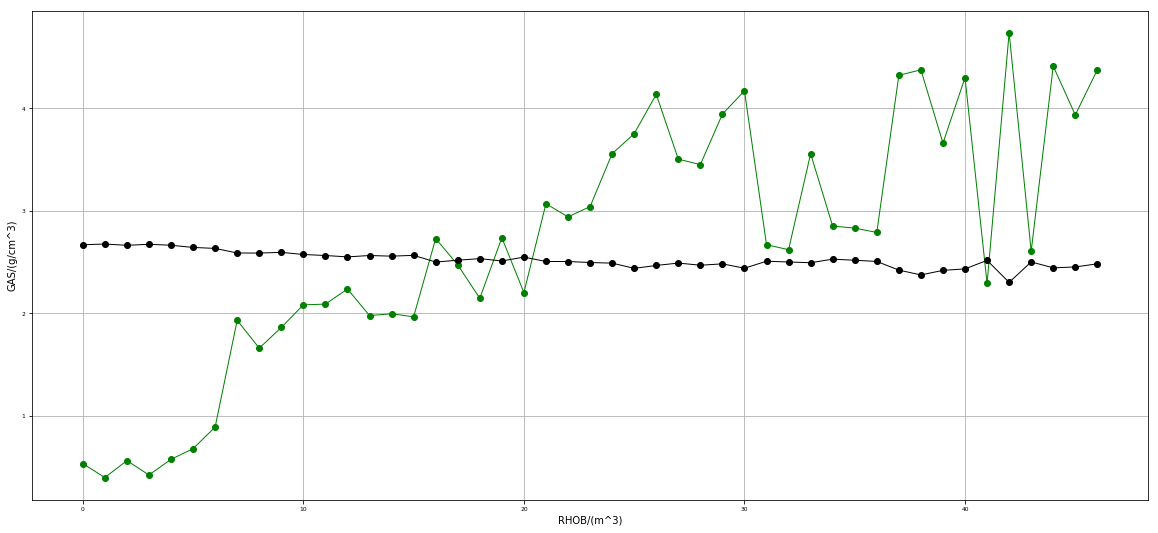

In [375]:
a = rf
a = a.reshape(-1, 1)
Aim = Aim.reshape(-1, 1)
NL_input_data = NL_input_data.reshape(-1, 3)
print("a_Aim:", np.hstack((a, Aim)))
print('mse: ', mean_squared_error(Aim, a))
#print('平均相对误差: ', np.average(np.abs(Aim - yhat_array) / a, axis=0))
print('R2: ', r2_score(a, Aim))
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)

# plt.title('loss')
# plt.figure()
# plt.plot(epochs, loss, 'blue', label=las_23.keys()[b] + ' loss')
# plt.legend(loc="best")
# plt.plot(epochs, val_loss, 'red', label=las_23.keys()[b] + ' val_loss')
# plt.close()
# plt.scatter(Aim, yhat_array, alpha=0.6)
# plt.plot((0, 5.4), (0, 5.4), ls='--', c='k', label="1:1 line")
# plt.xlabel("true/(m^3)")
# plt.ylabel("predict/(us/m)")
# plt.show()
# depth = [item.value for item in list(worksheet.columns)[0]]
fig_2 = plt.figure(figsize=(20, 9))  # 作图画布大小(每循环一次，就会建立新的画布）
# for f in range(3):
#     ax = fig_2.add_subplot(1, 4, f + 1)  # 图布一行len(a)列，画在第f+1块
#     ax.plot(Para_VVR[train_data_length:, f], depth)
#     ax.set_xlabel(df_Para.keys()[f])
#     ax.xaxis.tick_top()
#     ax.invert_yaxis()
#     plt.tick_params(labelsize=6)
ax = fig_2.add_subplot(1, 1, 1)
ax.plot(a, 'o-', color = 'green', linewidth=1, label='true_value')
# ax.plot(a, 'o-', color="red", linewidth=2, label='predict_value')
# ax.plot(NL_input_data[:, 0],  'o-', color = 'blue', linewidth=2, label='DTS')
# ax.plot(NL_input_data[:, 1], 'o-',color = 'purple', linewidth=2, label='DT')
ax.plot(Para_VVR[:, 2], 'o-', color = 'black', linewidth=1, label='RHOB')
# plt.xticks(np.arange(1, 38 , 1))
# plt.scatter(Para_VVR[:, 2], NL_output_data, alpha=0.6)
plt.xlabel("RHOB/(m^3)")
plt.ylabel("GAS/(g/cm^3)")
# ax.set_xlabel(las_23.keys()[b])
plt.tick_params(labelsize=6)
#     # plt.savefig(r"D:\software\pycharm\PyCharm 2019.3.3\projects\predict_GASV\结果\onewey\图片\两口井3to5\onecon/" + name + ".png")
#     plt.savefig("lab_bp_loocv_carve_predict")
plt.grid() 
plt.show()
# with open(r'D:\software\pycharm\PyCharm 2019.3.3\projects\predict_GASV\结果\onewey\class\Aim_predict_nonsort.txt', 'w') as f:
#     np.savetxt(f, Aim_data, fmt="%.6f")
# resullt: mse:  0.19096958874525233
# R2:  0.9763681438005949